<a href="https://colab.research.google.com/github/mvmoghadam1999/Mp2_testing/blob/main/ML_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt


q1_2 -> plotting the function

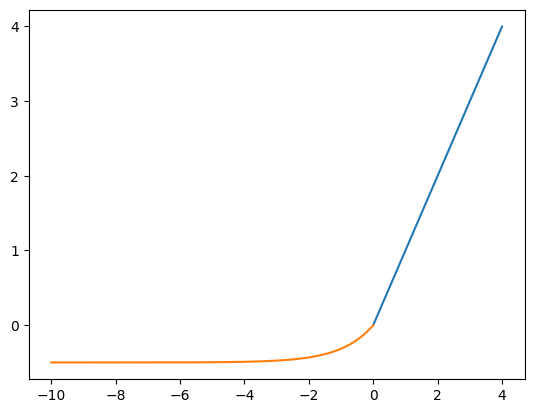

In [23]:
alpha = 0.5
x1 = np.linspace(0 , 4 , 1000)
x2 = np.linspace(-10 , 0 , 1000)
y1 = x1
y2 = alpha*(np.exp(x2) - 1)
plt.plot(x1 , y1)
plt.plot(x2 , y2)
plt.show()

q1_3 -> `McCulloch_Putts_neuron` class

In [24]:
def ReLU(x):
  return max(0 , x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self , x):
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0
  def model_ReLU(self , x):
    out_relu = ReLU((self.weights @ x) - self.threshold)
    if out_relu == (self.weights @ x) - self.threshold:
      return 1
    if out_relu == 0:
      return 0
  def model_sig(self , x):
    out_sig = sigmoid((self.weights @ x) - self.threshold)
    if out_sig >= 0.5:
      return 1
    if out_sig <= 0.5:
      return 0



`Area` normal function to predict points in "triangle"

In [25]:
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))

  return list([z4]) , neur1 , neur2 , neur3

`Area` with `ReLU` function to predict points in "triangle"

In [26]:
def Area_ReLU(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model_ReLU(np.array([x, y]))
  z2 = neur2.model_ReLU(np.array([x, y]))
  z3 = neur3.model_ReLU(np.array([x, y]))
  z4 = neur4.model_ReLU(np.array([z1, z2, z3]))

  return list([z4]) , neur1 , neur2 , neur3

`Area` with `sigmoid` function to predict points in "triangle"

In [27]:
def Area_sig(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model_sig(np.array([x, y]))
  z2 = neur2.model_sig(np.array([x, y]))
  z3 = neur3.model_sig(np.array([x, y]))
  z4 = neur4.model_sig(np.array([z1, z2, z3]))

  return list([z4]) , neur1 , neur2 , neur3

plotting triangle and hatch the region that green point are in it for `normal function`

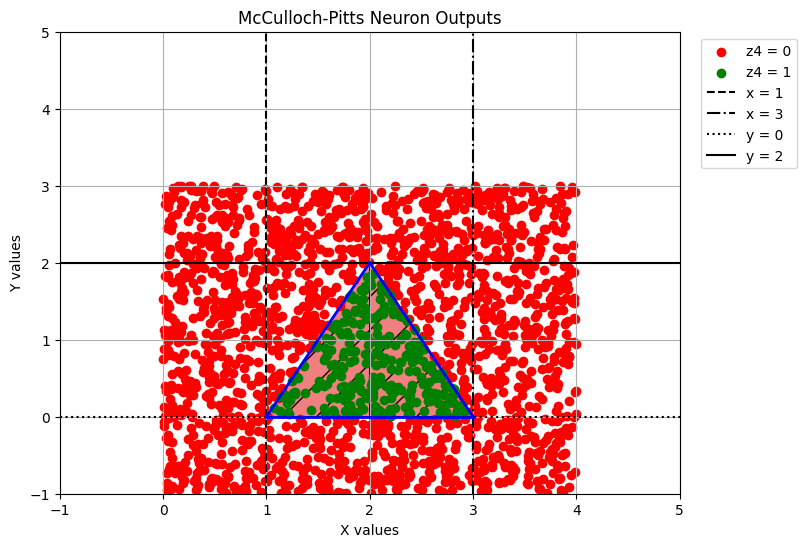

In [28]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)


red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value[0] == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
x11 = np.linspace(1 ,2 , 1000)
x22 = np.linspace(2 ,3 , 1000)
x33 = np.linspace(1 ,3 , 1000)
y11 = ((-z4_value[1].weights[0])*x11+z4_value[1].threshold)/(z4_value[1].weights[1])
y22 = ((-z4_value[2].weights[0])*x22+z4_value[2].threshold)/(z4_value[2].weights[1])
y33 = ((-z4_value[3].weights[0])*x33+z4_value[3].threshold)/(z4_value[3].weights[1])
xh =  np.linspace(1 ,y33 , 1000)
plt.figure(figsize=(8, 6))
plt.fill_between(x22, y22 , y33 , color = 'lightcoral')
plt.fill_between(x11, y11 , y33 , color = 'lightcoral')
plt.fill_between(x22, y22 , y33 , color='none', edgecolor='black', hatch="/")
plt.fill_between(x11, y11 , y33 , color='none', edgecolor='black', hatch="/")
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=3, color='black', linestyle='-.', label='x = 3')
plt.axhline(y=0, color='black', linestyle=':', label='y = 0')
plt.axhline(y=2, color='black', linestyle='-', label='y = 2')

plt.plot(x11, y11 , color = 'blue' , linewidth = 2)
plt.plot(x22, y22 , color = 'blue' , linewidth = 2)
plt.plot(x33, y33 , color = 'blue' , linewidth = 2)
plt.grid(True)


plt.xlim(-1, 5)
plt.ylim(-1, 5)


plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('c.png', bbox_inches='tight')

plt.show()

plotting triangle and hatch the region that green point are in it for` function with ReLU`

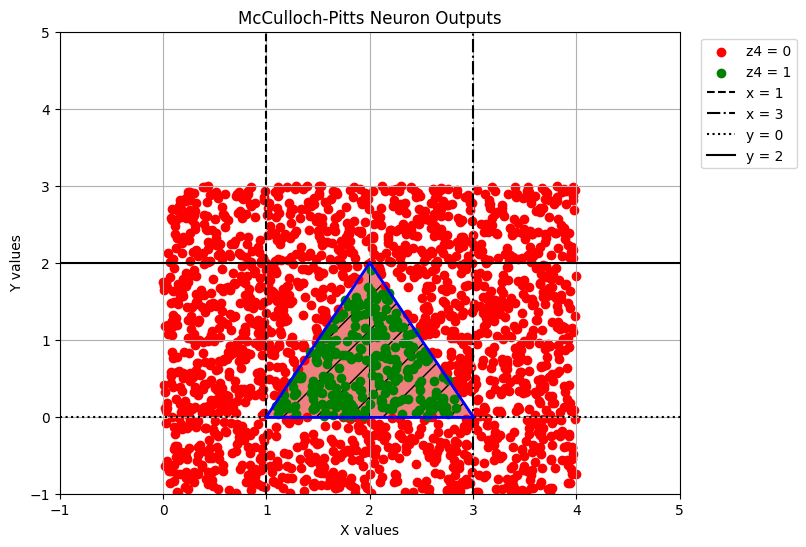

In [29]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)


red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area_ReLU(x_values[i], y_values[i])
    if z4_value[0] == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
x11 = np.linspace(1 ,2 , 1000)
x22 = np.linspace(2 ,3 , 1000)
x33 = np.linspace(1 ,3 , 1000)
y11 = ((-z4_value[1].weights[0])*x11+z4_value[1].threshold)/(z4_value[1].weights[1])
y22 = ((-z4_value[2].weights[0])*x22+z4_value[2].threshold)/(z4_value[2].weights[1])
y33 = ((-z4_value[3].weights[0])*x33+z4_value[3].threshold)/(z4_value[3].weights[1])
xh =  np.linspace(1 ,y33 , 1000)
plt.figure(figsize=(8, 6))
plt.fill_between(x22, y22 , y33 , color = 'lightcoral')
plt.fill_between(x11, y11 , y33 , color = 'lightcoral')
plt.fill_between(x22, y22 , y33 , color='none', edgecolor='black', hatch="/")
plt.fill_between(x11, y11 , y33 , color='none', edgecolor='black', hatch="/")
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=3, color='black', linestyle='-.', label='x = 3')
plt.axhline(y=0, color='black', linestyle=':', label='y = 0')
plt.axhline(y=2, color='black', linestyle='-', label='y = 2')

plt.plot(x11, y11 , color = 'blue' , linewidth = 2)
plt.plot(x22, y22 , color = 'blue' , linewidth = 2)
plt.plot(x33, y33 , color = 'blue' , linewidth = 2)
plt.grid(True)

plt.xlim(-1, 5)
plt.ylim(-1, 5)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('c.png', bbox_inches='tight')

plt.show()

plotting triangle and hatch the region that green point are in it for` function with sigmoid`

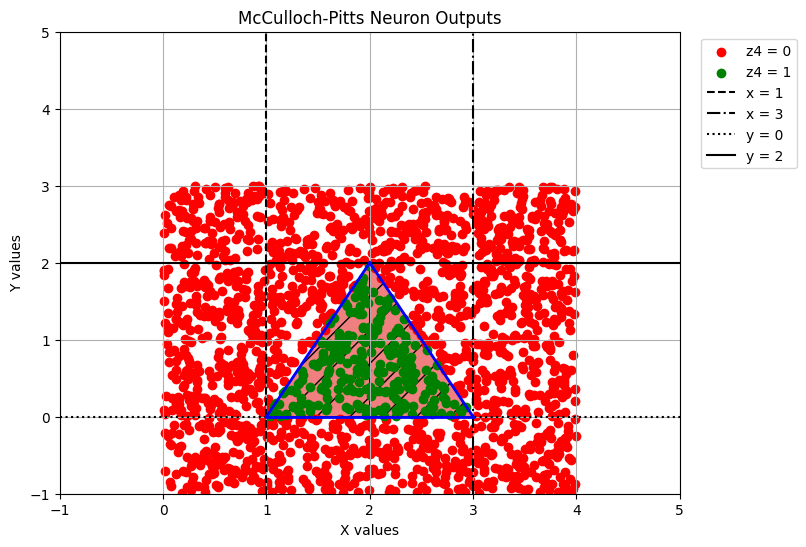

In [30]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area_sig(x_values[i], y_values[i])
    if z4_value[0] == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
x11 = np.linspace(1 ,2 , 1000)
x22 = np.linspace(2 ,3 , 1000)
x33 = np.linspace(1 ,3 , 1000)
y11 = ((-z4_value[1].weights[0])*x11+z4_value[1].threshold)/(z4_value[1].weights[1])
y22 = ((-z4_value[2].weights[0])*x22+z4_value[2].threshold)/(z4_value[2].weights[1])
y33 = ((-z4_value[3].weights[0])*x33+z4_value[3].threshold)/(z4_value[3].weights[1])
xh =  np.linspace(1 ,y33 , 1000)
plt.figure(figsize=(8, 6))
plt.fill_between(x22, y22 , y33 , color = 'lightcoral')
plt.fill_between(x11, y11 , y33 , color = 'lightcoral')
plt.fill_between(x22, y22 , y33 , color='none', edgecolor='black', hatch="/")
plt.fill_between(x11, y11 , y33 , color='none', edgecolor='black', hatch="/")
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=3, color='black', linestyle='-.', label='x = 3')
plt.axhline(y=0, color='black', linestyle=':', label='y = 0')
plt.axhline(y=2, color='black', linestyle='-', label='y = 2')

plt.plot(x11, y11 , color = 'blue' , linewidth = 2)
plt.plot(x22, y22 , color = 'blue' , linewidth = 2)
plt.plot(x33, y33 , color = 'blue' , linewidth = 2)
plt.grid(True)


plt.xlim(-1, 5)
plt.ylim(-1, 5)


plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('c.png', bbox_inches='tight')

plt.show()

q2_1 -> data and data preprocessing

In [31]:
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
!pip install --upgrade --no-cache-dir gdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDClassifier , LogisticRegression , RidgeClassifier
try:
    import mlxtend
except:
    !pip install -U mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
!pip install drawdata
!pip install pandas polars
from drawdata import ScatterWidget

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.4/248.4 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [32]:
!gdown 1qDvHzoD7uHy_Wm067KwyNL8g6OPjRByj
!gdown 140WxA8cuZrukyNC30x1UQ17wtdX7zQMc

Downloading...
From: https://drive.google.com/uc?id=1qDvHzoD7uHy_Wm067KwyNL8g6OPjRByj
To: /content/data_forq2_MP2_csv.csv
100% 3.13M/3.13M [00:00<00:00, 73.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=140WxA8cuZrukyNC30x1UQ17wtdX7zQMc
To: /content/data_forq2.csv
100% 8.24M/8.24M [00:00<00:00, 45.0MB/s]


In [33]:
import pandas as pd
import numpy as np
import random

data = pd.read_csv('/content/data_forq2.csv')
data2 = pd.read_csv('/content/data_forq2_MP2_csv.csv')
X_true = data[['x']].values
y_fault = data[['y']].values
y_fault2 = data2[['fault2']].values
y_fault3 = data2[['fault3']].values


X_true_set = np.array(X_true[:20000])
y_fault_set = np.array(y_fault[:20000])
y_fault2_set = np.array(y_fault2[:20000])
y_fault3_set = np.array(y_fault3[:20000])


X_true_set = X_true_set.reshape(100 , 200)
y_fault_set = y_fault_set.reshape(100 , 200)
y_fault2_set = y_fault2_set.reshape(100 , 200)
y_fault3_set = y_fault3_set.reshape(100 , 200)
list1 = []
list2 = []
list3 = []
list4 = []
for i in range(100):
  list1.append(1)
  list2.append(0)
  list3.append(2)
  list4.append(3)
one_col = np.array(list1)
zero_col = np.array(list2)
two_col = np.array(list3)
three_col = np.array(list4)
one_col = one_col.reshape(100 , 1)
zero_col = zero_col.reshape(100 , 1)
two_col = two_col.reshape(100 , 1)
three_col = three_col.reshape(100 , 1)
X_true_set_with_label = np.append(X_true_set, one_col , axis = 1)
y_fault_set_with_label = np.append(y_fault_set , zero_col , axis = 1)
y_fault2_set_with_label = np.append(y_fault2_set , two_col , axis = 1)
y_fault3_set_with_label = np.append(y_fault3_set , three_col , axis = 1)
dataset = np.vstack((X_true_set, y_fault_set, y_fault2_set, y_fault3_set))
dataset_with_label = np.vstack((X_true_set_with_label , y_fault_set_with_label , y_fault2_set_with_label , y_fault3_set_with_label))


In [34]:
X_true_set[1].shape

(200,)

In [35]:
from sklearn.utils import shuffle

def Peak(x):
  return np.max(np.abs(x))
def Standard_deviation(x):
  sum = 0
  for i in range(len(x)):
    sum += np.power((x[i] - np.mean(x)) , 2)
  return(np.sqrt(sum/len(x)))
def Skewness(x):
  sum = 0
  for i in range(len(x)):
    sum += (np.power((x[i] - np.mean(x)) , 3))/len(x)
  return sum/(np.power(Standard_deviation(x) , 3))
def Kurtosis(x):
  sum = 0
  for i in range(len(x)):
    sum += (np.power((x[i] - np.mean(x)) , 4))/len(x)
  return sum/(np.power(Standard_deviation(x) , 4))
def RMS(x):
  sum = 0
  for i in range(len(x)):
    sum += np.power(x[i] , 2)
  return np.sqrt((1/len(x))*sum)
def Crest_Factor(x):
  return((Peak(x))/(RMS(x)))
def SMR(x):
  sum = 0
  for i in range(len(x)):
    sum += np.sqrt(np.abs(x[i]))
  return (np.power(sum/len(x) , 2))
def Clearance_Factor(x):
  return((Peak(x))/(SMR(x)))
def Peak_to_Peak(x):
  return (np.max(x) - np.min(x))
def Mean(x):
  return np.mean(x)
def feature(x):
  X_feature = []
  for i in range(100):
    X_feature.append([Peak(x[i]) , Standard_deviation(x[i]) , Skewness(x[i]) , Kurtosis(x[i]) , RMS(x[i]) , Crest_Factor(x[i]) , SMR(x[i]) , Clearance_Factor(x[i]) , Peak_to_Peak(x[i]) , Mean(x[i])])
  X_feature = np.array(X_feature)
  X_feature = X_feature.reshape(100 , 10)
  return X_feature

In [36]:
a1 = np.array([[1 , 2 , 4 , 7]])
Peak_to_Peak(a1)

6

In [37]:
from sklearn.utils import shuffle

feature_X_true = feature(X_true_set)
feature_X_true_with_label = np.append(feature_X_true , one_col , axis = 1)
feature_y_fault = feature(y_fault_set)
feature_y_fault_with_label = np.append(feature_y_fault , zero_col , axis = 1)
feature_y_fault2 = feature(y_fault2_set)
feature_y_fault2_with_label = np.append(feature_y_fault2 , two_col , axis = 1)
feature_y_fault3 = feature(y_fault3_set)
feature_y_fault3_with_label = np.append(feature_y_fault3 , three_col , axis = 1)
feature_data_with_label = np.vstack((feature_X_true_with_label , feature_y_fault_with_label , feature_y_fault2_with_label , feature_y_fault3_with_label))
X_shuffle , y_shuffle = shuffle(feature_data_with_label[: , :10] , feature_data_with_label[: , 10])
y_shuffle = y_shuffle.reshape(400 , 1)
shuffled_data = np.append(X_shuffle , y_shuffle , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(shuffled_data[: , :10] ,
                                                       shuffled_data[: , 10] ,
                                                       test_size = 0.2 ,
                                                       random_state = 74)
X_real_test , X_validation , y_real_test , y_validation = train_test_split(X_test ,
                                                                           y_test ,
                                                                           test_size = 0.2 ,
                                                                           random_state = 74)
y_train = y_train.reshape(320 , 1)
y_real_test = y_real_test.reshape(64 , 1)
y_validation = y_validation.reshape(16 , 1)
y_test = y_test.reshape(80 , 1)
X_train_with_label = np.append(X_train , y_train , axis = 1)
X_real_test_with_label = np.append(X_real_test , y_real_test , axis = 1)
X_validation_with_label = np.append(X_validation , y_validation , axis = 1)


In [38]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
scaler2 =  StandardScaler()
X_tr_normal = scaler2.fit_transform(X_train)
X_te_normal = scaler2.fit_transform(X_test)
X_val_normal = scaler2.fit_transform(X_validation)
X_trl_normal = np.append(X_tr_normal , y_train , axis = 1)
X_tel_normal = np.append(X_te_normal , y_test , axis = 1)
X_tvl_normal = np.append(X_val_normal , y_validation , axis = 1)

models

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_diabetes, load_digits
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

Epoch 1/50
20/20 [==============================] - 4s 41ms/step - loss: 1.6207 - acc: 0.1219 - val_loss: 1.4828 - val_acc: 0.2000
Epoch 2/50
20/20 [==============================] - 0s 13ms/step - loss: 1.4320 - acc: 0.2969 - val_loss: 1.3221 - val_acc: 0.4625
Epoch 3/50
20/20 [==============================] - 0s 14ms/step - loss: 1.2888 - acc: 0.3844 - val_loss: 1.1875 - val_acc: 0.5000
Epoch 4/50
20/20 [==============================] - 0s 11ms/step - loss: 1.1742 - acc: 0.4844 - val_loss: 1.0905 - val_acc: 0.6125
Epoch 5/50
20/20 [==============================] - 0s 14ms/step - loss: 1.0887 - acc: 0.6031 - val_loss: 1.0124 - val_acc: 0.6625
Epoch 6/50
20/20 [==============================] - 0s 16ms/step - loss: 1.0122 - acc: 0.6656 - val_loss: 0.9390 - val_acc: 0.6875
Epoch 7/50
20/20 [==============================] - 0s 19ms/step - loss: 0.9336 - acc: 0.6938 - val_loss: 0.8713 - val_acc: 0.6875
Epoch 8/50
20/20 [==============================] - 0s 17ms/step - loss: 0.8562 - a

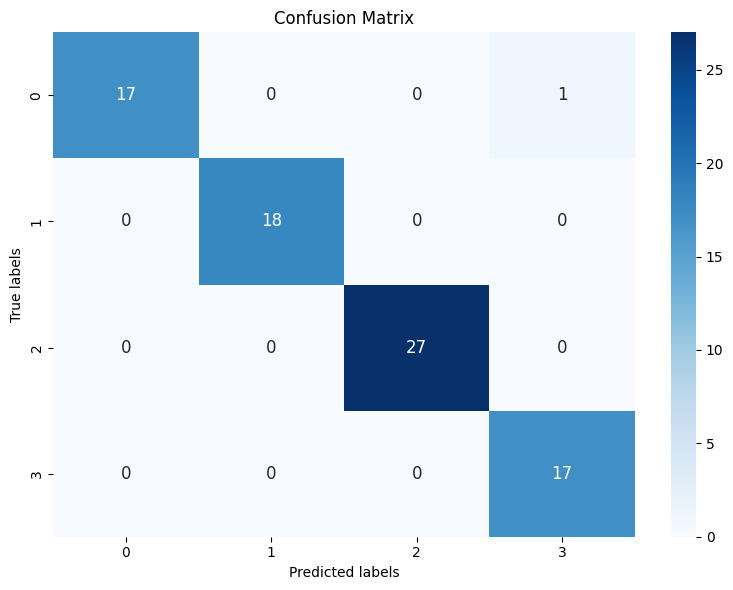

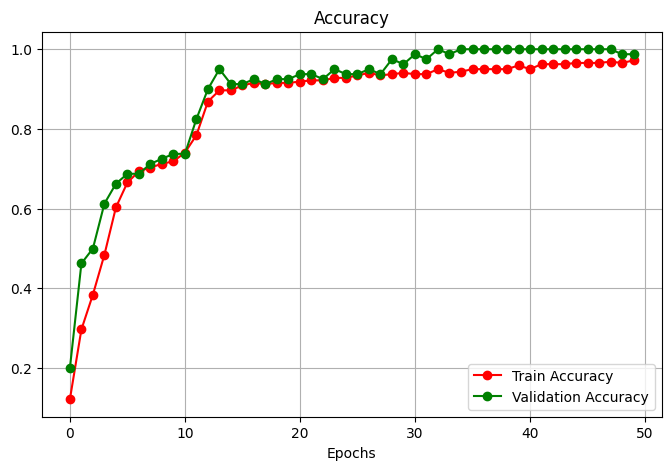

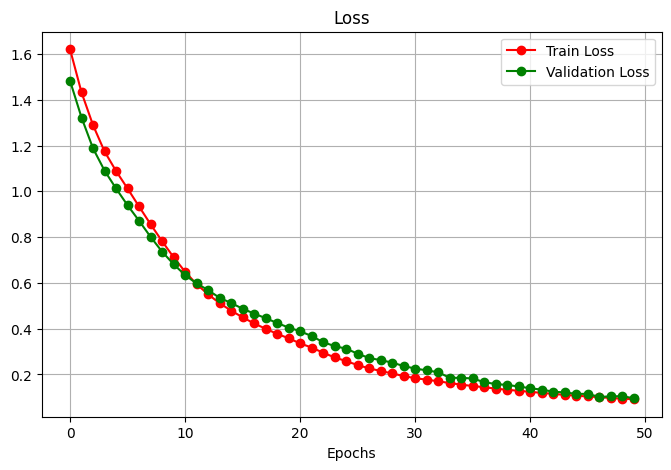

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential, clone_model
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy , BinaryCrossentropy
model_keras = Sequential(
    [
        Input(shape=(10,), name='Input'),
        Dense(units=12, activation='relu', name='Hidden_1'),
        Dense(units=8, activation='relu', name='Hidden_2'),
        Dense(units=4, activation='softmax', name='Classification')
    ]
)




loss_fn = SparseCategoricalCrossentropy()
optim_fn = Adam(learning_rate=0.001)
model_keras.compile(optimizer=optim_fn, loss=loss_fn, metrics=['acc'])
history = model_keras.fit(X_tr_normal, y_train, validation_data = (X_te_normal, y_test) , epochs=50, batch_size=16)
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
results = model_keras.evaluate(X_te_normal , y_test)
y_pred_keras = model_keras.predict(X_te_normal)
# y_pred_keras_tens = torch.Tensor(y_pred_keras)
# y_t_pre = model_keras.predict(X_tr_normal)
rscore_2 = r2_score(y_test , np.argmax(y_pred_keras , axis = 1))

print(rscore_2)

cf_matrix = confusion_matrix(y_test, np.argmax(y_pred_keras , axis = 1))


print(classification_report(y_test.reshape(80 , ) , np.argmax(y_pred_keras , axis = 1)))


plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.tight_layout()
plt.savefig('confusion_matrix1.png', dpi=300)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()



Epoch 1/50
20/20 [==============================] - 1s 18ms/step - loss: 1.5379 - acc: 0.0250 - val_loss: 1.5129 - val_acc: 0.0125
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 1.5139 - acc: 0.0281 - val_loss: 1.4924 - val_acc: 0.0125
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 1.4914 - acc: 0.0312 - val_loss: 1.4731 - val_acc: 0.0125
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 1.4704 - acc: 0.0281 - val_loss: 1.4549 - val_acc: 0.0125
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 1.4504 - acc: 0.0281 - val_loss: 1.4376 - val_acc: 0.0125
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 1.4315 - acc: 0.0312 - val_loss: 1.4212 - val_acc: 0.0250
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 1.4139 - acc: 0.0375 - val_loss: 1.4066 - val_acc: 0.0750
Epoch 8/50
20/20 [==============================] - 0s 6ms/step - loss: 1.3990 - acc: 0.0

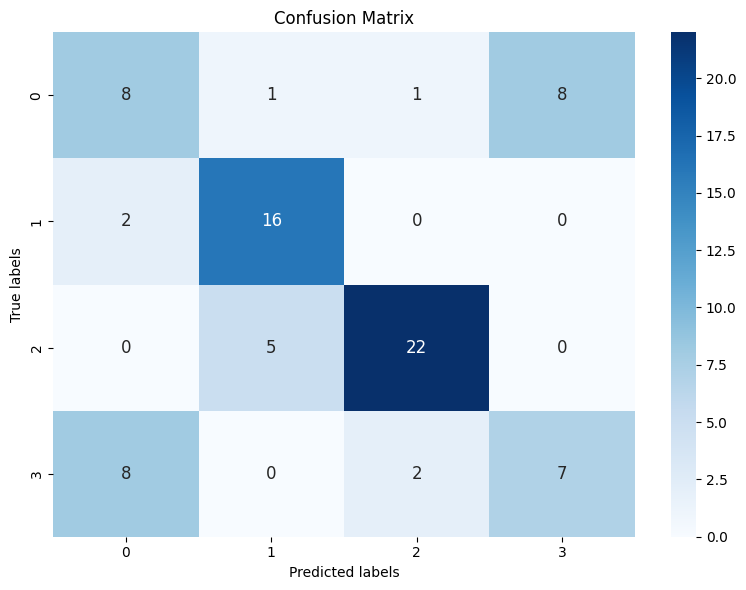

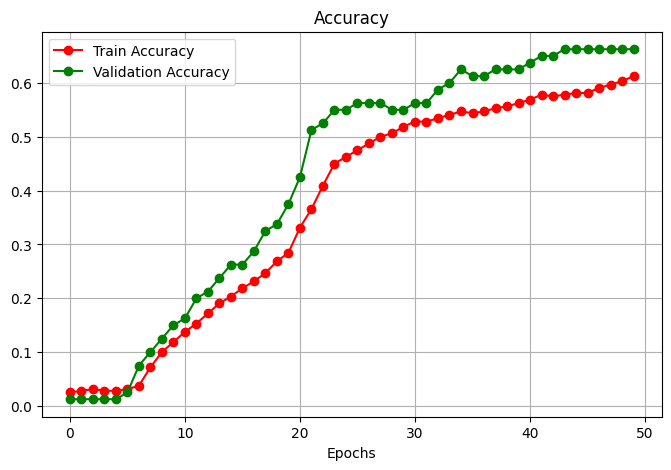

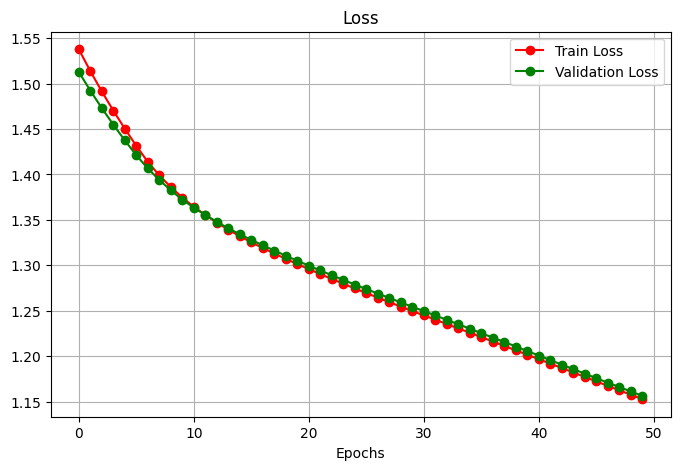

In [42]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy , MeanSquaredError

model_keras = Sequential(
    [
        Input(shape=(10,), name='Input'),
        Dense(units=12, activation='relu', name='Hidden_1'),
        Dense(units=8, activation='relu', name='Hidden_2'),
        Dense(units=4, activation='softmax', name='Classification')
    ]
)




loss_fn = SparseCategoricalCrossentropy()
optim_fn = SGD(learning_rate=0.001)
model_keras.compile(optimizer=optim_fn, loss=loss_fn, metrics=['acc'])
history = model_keras.fit(X_tr_normal, y_train, validation_data = (X_te_normal, y_test) , epochs=50, batch_size=16)
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
results = model_keras.evaluate(X_te_normal , y_test)
y_pred_keras = model_keras.predict(X_te_normal)
y_t_pre = model_keras.predict(X_tr_normal)
rscore_2 = r2_score(y_test , np.argmax(y_pred_keras , axis = 1))

print(rscore_2)

cf_matrix = confusion_matrix(y_test, np.argmax(y_pred_keras , axis = 1))


print(classification_report(y_test.reshape(80 , ) , np.argmax(y_pred_keras , axis = 1)))


plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.tight_layout()
plt.savefig('confusion_matrix2.png', dpi=300)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

Epoch 1/50
20/20 [==============================] - 3s 35ms/step - loss: 2.8397 - acc: 0.3281 - val_loss: 2.7953 - val_acc: 0.3500
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 2.8306 - acc: 0.3187 - val_loss: 2.7886 - val_acc: 0.3125
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 2.8257 - acc: 0.3156 - val_loss: 2.7852 - val_acc: 0.4875
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 2.8234 - acc: 0.3938 - val_loss: 2.7836 - val_acc: 0.5375
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8223 - acc: 0.3812 - val_loss: 2.7828 - val_acc: 0.4750
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8217 - acc: 0.3625 - val_loss: 2.7823 - val_acc: 0.4250
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8213 - acc: 0.3313 - val_loss: 2.7821 - val_acc: 0.4125
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8211 - acc: 0.2

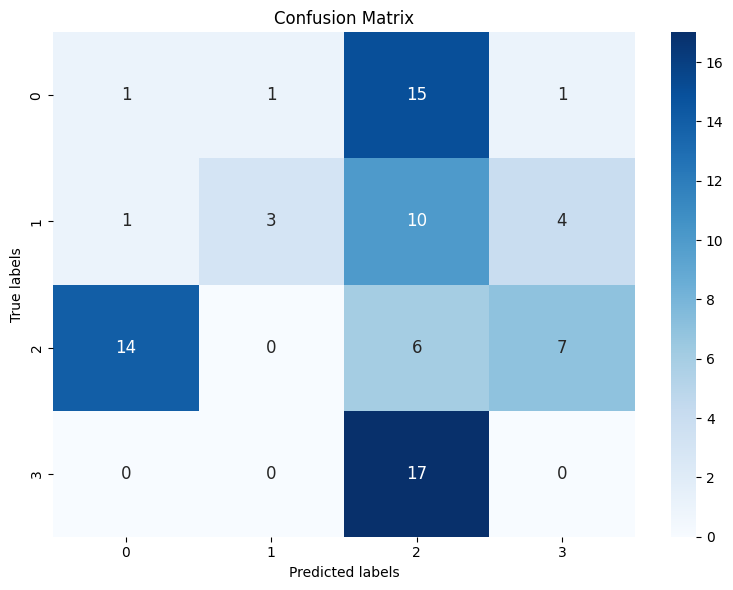

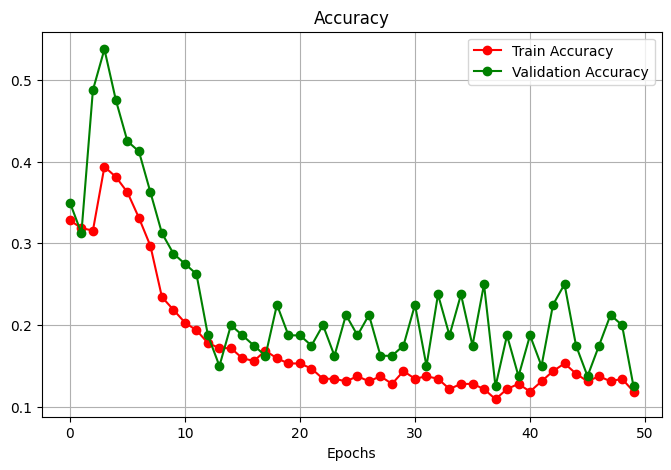

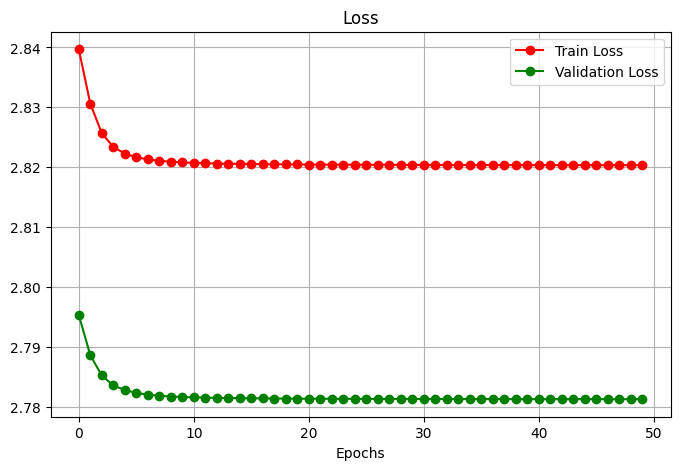

In [43]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy , MeanSquaredError

model_keras = Sequential(
    [
        Input(shape=(10,), name='Input'),
        Dense(units=12, activation='relu', name='Hidden_1'),
        Dense(units=8, activation='relu', name='Hidden_2'),
        Dense(units=4, activation='softmax', name='Classification')
    ]
)




loss_fn = MeanSquaredError()
optim_fn = Adam(learning_rate=0.001)
model_keras.compile(optimizer=optim_fn, loss=loss_fn, metrics=['acc'])
history = model_keras.fit(X_tr_normal, y_train, validation_data = (X_te_normal, y_test) , epochs=50, batch_size=16)
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
results = model_keras.evaluate(X_te_normal , y_test)
y_pred_keras = model_keras.predict(X_te_normal)
y_pred_keras_tens = torch.Tensor(y_pred_keras)
y_t_pre = model_keras.predict(X_tr_normal)
rscore_2 = r2_score(y_test , np.argmax(y_pred_keras , axis = 1))

print(rscore_2)

cf_matrix = confusion_matrix(y_test, np.argmax(y_pred_keras , axis = 1))


print(classification_report(y_test.reshape(80 , ) , np.argmax(y_pred_keras , axis = 1)))


plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.tight_layout()
plt.savefig('confusion_matrix3.png', dpi=300)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 2.8321 - acc: 0.4313 - val_loss: 2.7936 - val_acc: 0.3750
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 2.8320 - acc: 0.4313 - val_loss: 2.7936 - val_acc: 0.3750
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8320 - acc: 0.4313 - val_loss: 2.7935 - val_acc: 0.3750
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8319 - acc: 0.4250 - val_loss: 2.7935 - val_acc: 0.3750
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 2.8319 - acc: 0.4187 - val_loss: 2.7934 - val_acc: 0.3750
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 2.8318 - acc: 0.4281 - val_loss: 2.7934 - val_acc: 0.3750
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 2.8318 - acc: 0.4281 - val_loss: 2.7933 - val_acc: 0.3750
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 2.8317 - acc: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


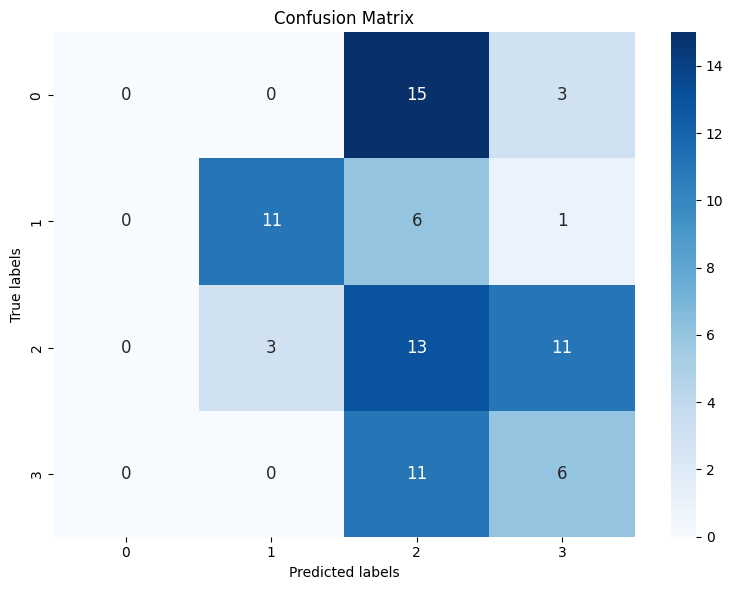

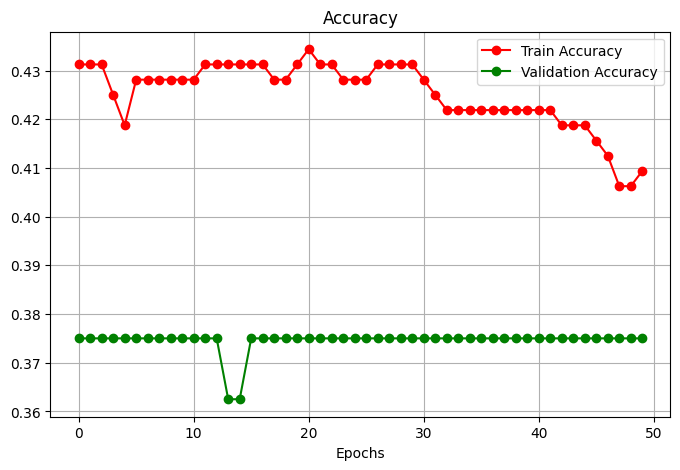

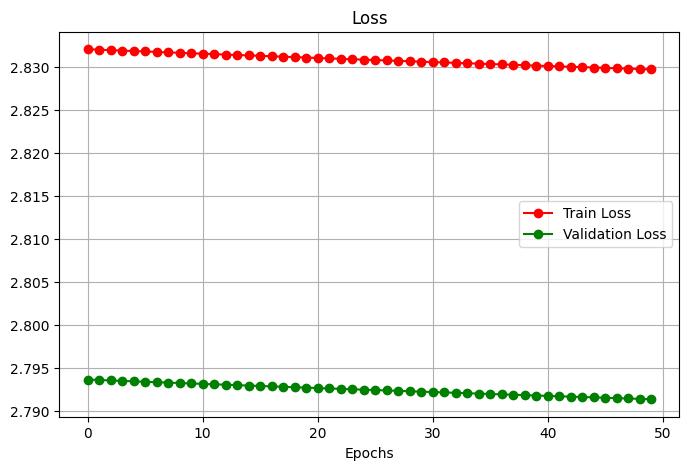

In [44]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy , MeanSquaredError

model_keras = Sequential(
    [
        Input(shape=(10,), name='Input'),
        Dense(units=12, activation='relu', name='Hidden_1'),
        Dense(units=8, activation='relu', name='Hidden_2'),
        Dense(units=4, activation='softmax', name='Classification')
    ]
)




loss_fn = MeanSquaredError()
optim_fn = SGD(learning_rate=0.001)
model_keras.compile(optimizer=optim_fn, loss=loss_fn, metrics=['acc'])
history = model_keras.fit(X_tr_normal, y_train, validation_data = (X_te_normal, y_test) , epochs=50, batch_size=16)
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
results = model_keras.evaluate(X_te_normal , y_test)
y_pred_keras = model_keras.predict(X_te_normal)
y_pred_keras_tens = torch.Tensor(y_pred_keras)
y_t_pre = model_keras.predict(X_tr_normal)
rscore_2 = r2_score(y_test , np.argmax(y_pred_keras , axis = 1))

print(rscore_2)

cf_matrix = confusion_matrix(y_test, np.argmax(y_pred_keras , axis = 1))


print(classification_report(y_test.reshape(80 , ) , np.argmax(y_pred_keras , axis = 1)))


plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.tight_layout()
plt.savefig('confusion_matrix4.png', dpi=300)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [45]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [46]:
torch.manual_seed(74)

from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
class fault(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.RReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.RReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


model_pytorch = fault(input_features=10,
                    output_features=4,
                    hidden_units=8).to(device)


In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pytorch.parameters(),
                            lr=0.01)

In [48]:
print(y_train.shape)
y_logits = model_pytorch(torch.Tensor(X_tr_normal))
print(y_logits.shape)

(320, 1)
torch.Size([320, 4])


In [49]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
X_tr_normal = torch.Tensor(X_tr_normal)
X_tr_normal = X_tr_normal.type(torch.float)
X_te_normal = torch.Tensor(X_te_normal)
X_te_normal = X_te_normal.type(torch.float)
y_train = torch.Tensor(y_train)
y_train = y_train.reshape(320 ,).type(torch.float)
y_test = torch.Tensor(y_test)
y_test = y_test.reshape(80 ,).type(torch.float)
X_tr_normal, y_train = X_tr_normal.to(device), y_train.to(device)
X_te_normal, y_test = X_te_normal.to(device), y_test.to(device)

epochs = 70
for epoch in range(epochs):

    model_pytorch.train()



    y_logits = model_pytorch(torch.Tensor(X_tr_normal))
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    y_train = torch.Tensor(y_train)
    y_train = y_train.reshape(320 ,).type(torch.long)

    loss = loss_fn(y_logits, torch.Tensor(y_train))
    acc = accuracy_fn(y_true=torch.Tensor(y_train),
                      y_pred=y_pred)


    optimizer.zero_grad()


    loss.backward()


    optimizer.step()


    model_pytorch.eval()
    with torch.inference_mode():

      test_logits = model_pytorch(torch.Tensor(X_te_normal))
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      y_test = torch.Tensor(y_test)
      y_test = y_test.reshape(80 ,).type(torch.long)
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=torch.Tensor(y_test),
                             y_pred=test_pred)


    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.39040, Acc: 25.62% | Test Loss: 1.39283, Test Acc: 22.50%
Epoch: 10 | Loss: 1.05592, Acc: 51.56% | Test Loss: 1.05236, Test Acc: 43.75%
Epoch: 20 | Loss: 0.66965, Acc: 63.75% | Test Loss: 0.69861, Test Acc: 50.00%
Epoch: 30 | Loss: 0.46951, Acc: 75.94% | Test Loss: 0.54105, Test Acc: 62.50%
Epoch: 40 | Loss: 0.38757, Acc: 79.38% | Test Loss: 0.44423, Test Acc: 65.00%
Epoch: 50 | Loss: 0.33116, Acc: 80.94% | Test Loss: 0.40479, Test Acc: 82.50%
Epoch: 60 | Loss: 0.27306, Acc: 91.56% | Test Loss: 0.33838, Test Acc: 92.50%


q3

In [50]:
!gdown 1tyRNdk5e64Rnta1D3Lq5G6hdMj8I7ohK

Downloading...
From: https://drive.google.com/uc?id=1tyRNdk5e64Rnta1D3Lq5G6hdMj8I7ohK
To: /content/drug_data.csv
100% 3.86k/3.86k [00:00<00:00, 14.9MB/s]


In [51]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
data_test_drug = pd.read_csv('/content/drug_data.csv')
y_drug = data_test_drug[['Drug']].values
X_drug = data_test_drug[['Age' , 'Sex' , 'BP' , 'Cholesterol' , 'Na_to_K']].values
X_pick , X_not_pick , y_pick , y_not_pick = train_test_split(X_drug ,
                                                             y_drug ,
                                                             test_size = 0.3)
X_train_drug , X_test_drug , y_train_drug , y_test_drug = train_test_split(X_pick ,
                                                                           y_pick ,
                                                                           test_size = 0.2)


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

`tree` classifier

0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8064516129032258


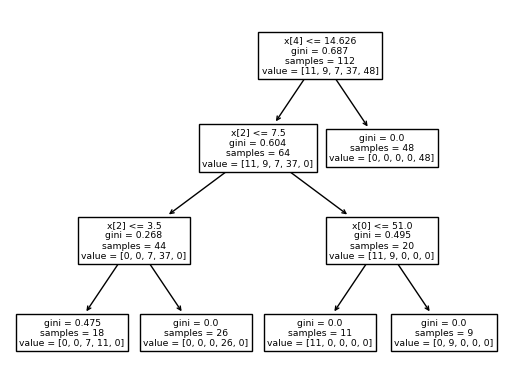

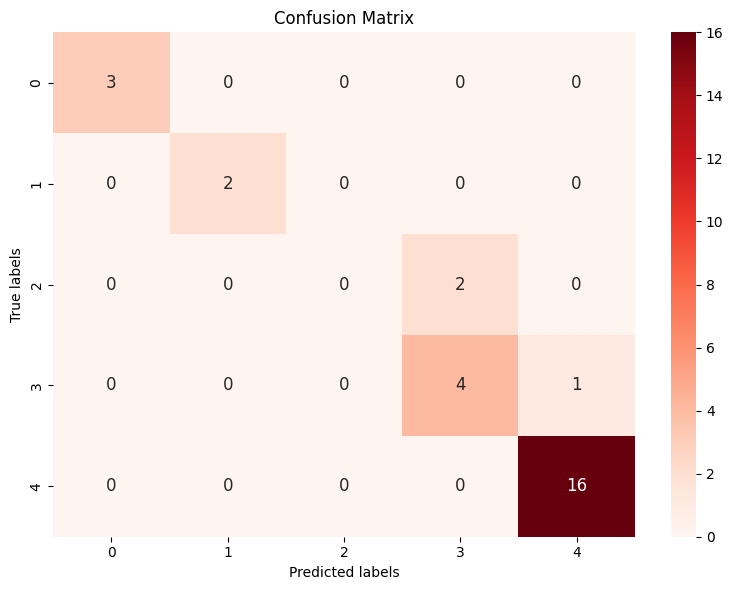

In [53]:
clf_dt1 = tree.DecisionTreeClassifier(max_depth=3, random_state=74, ccp_alpha=0)
clf_dt1.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt1);
print(clf_dt1.score(X_test_drug, y_test_drug))
y_pred_drug1 = clf_dt1.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug1 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug1 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug1 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug1 ,average='micro'))
cf_matrix_tree1 = confusion_matrix(y_test_drug, y_pred_drug1)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree1, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree1.png', dpi=300)

0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8064516129032258


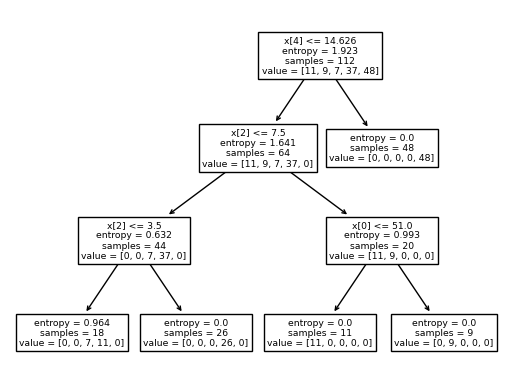

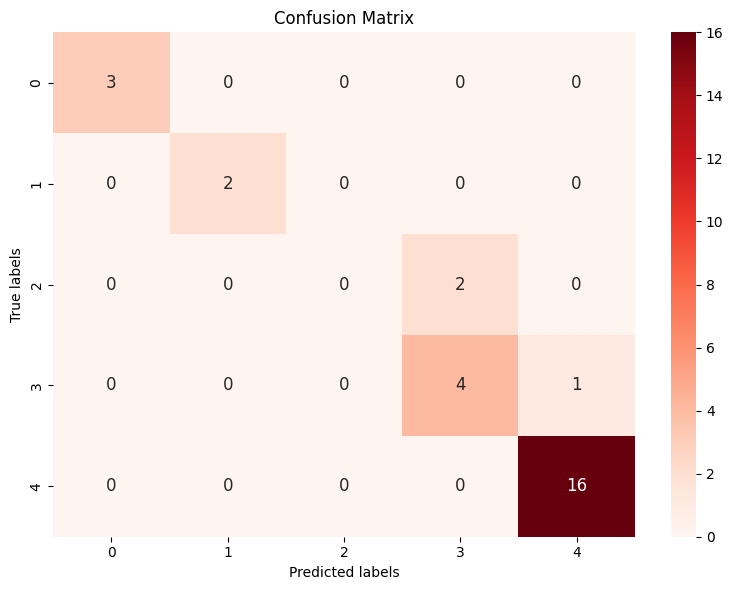

In [54]:
clf_dt2 = tree.DecisionTreeClassifier(max_depth=3, random_state=74, ccp_alpha=0 , criterion = 'entropy')
clf_dt2.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt2);
print(clf_dt2.score(X_test_drug, y_test_drug))
y_pred_drug2 = clf_dt2.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug2 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug2 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug2 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug2 ,average='micro'))
cf_matrix_tree2 = confusion_matrix(y_test_drug, y_pred_drug2)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree2, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree2.png', dpi=300)

0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.5555555555555556


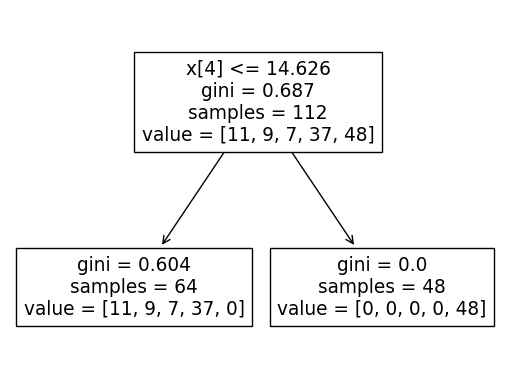

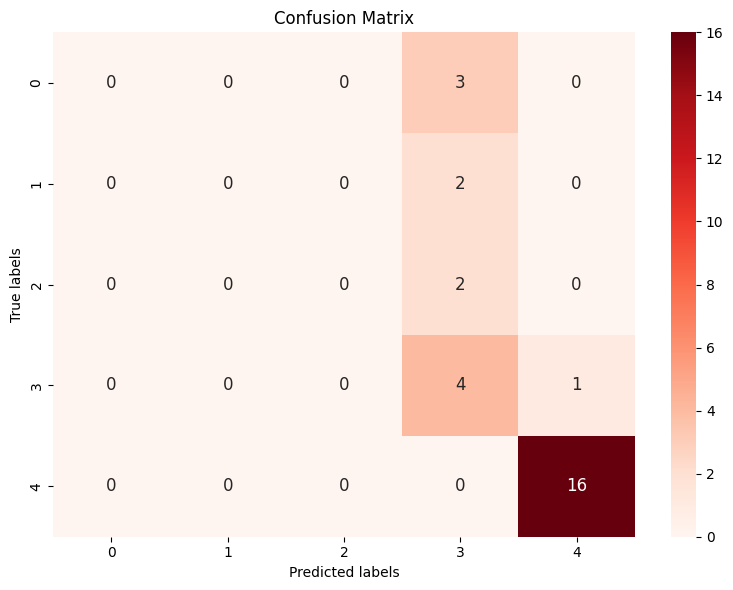

In [55]:
clf_dt3 = tree.DecisionTreeClassifier(max_depth=3, random_state=74, ccp_alpha=0.3)
clf_dt3.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt3);
print(clf_dt3.score(X_test_drug, y_test_drug))
y_pred_drug3 = clf_dt3.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug3 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug3 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug3 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug3 ,average='micro'))
cf_matrix_tree3 = confusion_matrix(y_test_drug, y_pred_drug3)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree3, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree3.png', dpi=300)

0.8214285714285714
0.8214285714285714
0.8214285714285714
0.8214285714285714
0.696969696969697


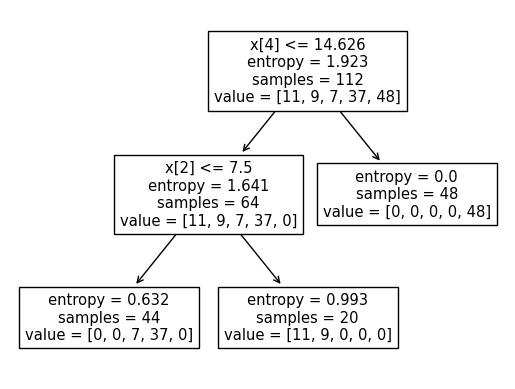

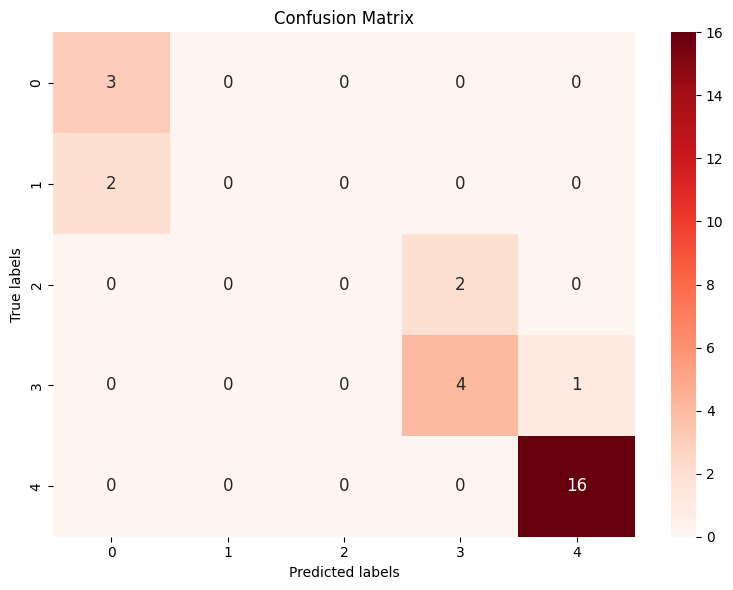

In [56]:
clf_dt4 = tree.DecisionTreeClassifier(max_depth=3, random_state=74, ccp_alpha=0.3 , criterion = 'entropy')
clf_dt4.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt4);
print(clf_dt4.score(X_test_drug, y_test_drug))
y_pred_drug4 = clf_dt4.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug4 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug4 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug4 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug4 ,average='micro'))
cf_matrix_tree4 = confusion_matrix(y_test_drug, y_pred_drug4)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree4, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree4.png', dpi=300)

0.8214285714285714
0.8214285714285714
0.8214285714285714
0.8214285714285714
0.696969696969697


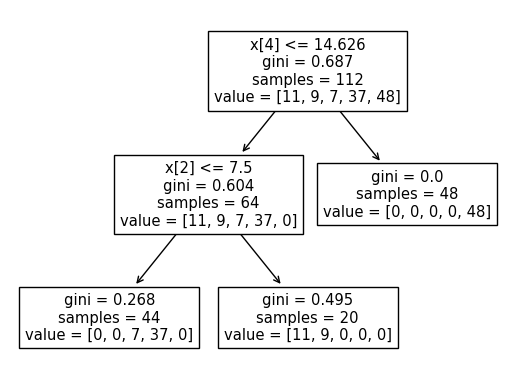

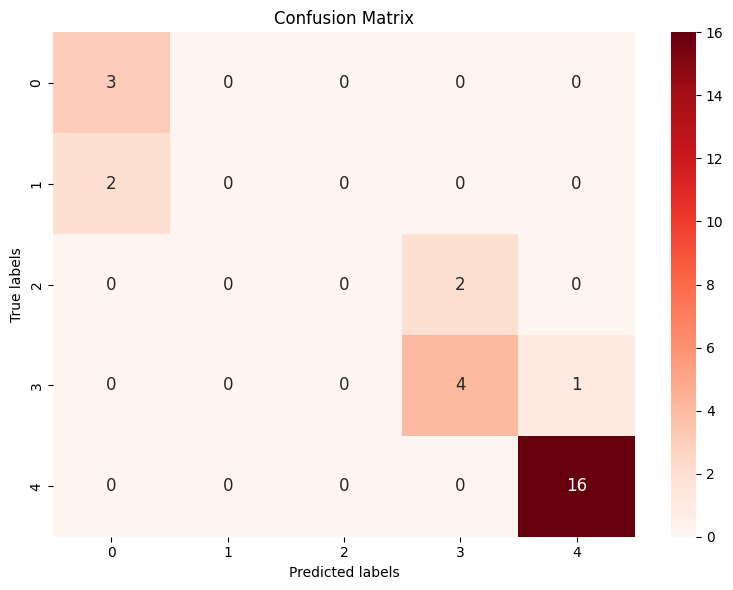

In [57]:
clf_dt5 = tree.DecisionTreeClassifier(max_depth=2, random_state=74, ccp_alpha=0)
clf_dt5.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt5);
print(clf_dt5.score(X_test_drug, y_test_drug))
y_pred_drug5 = clf_dt5.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug5 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug5 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug5 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug5 ,average='micro'))
cf_matrix_tree5 = confusion_matrix(y_test_drug, y_pred_drug5)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree5, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree5.png', dpi=300)

0.8214285714285714
0.8214285714285714
0.8214285714285714
0.8214285714285714
0.696969696969697


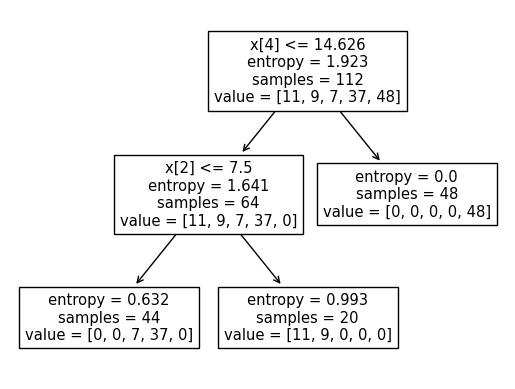

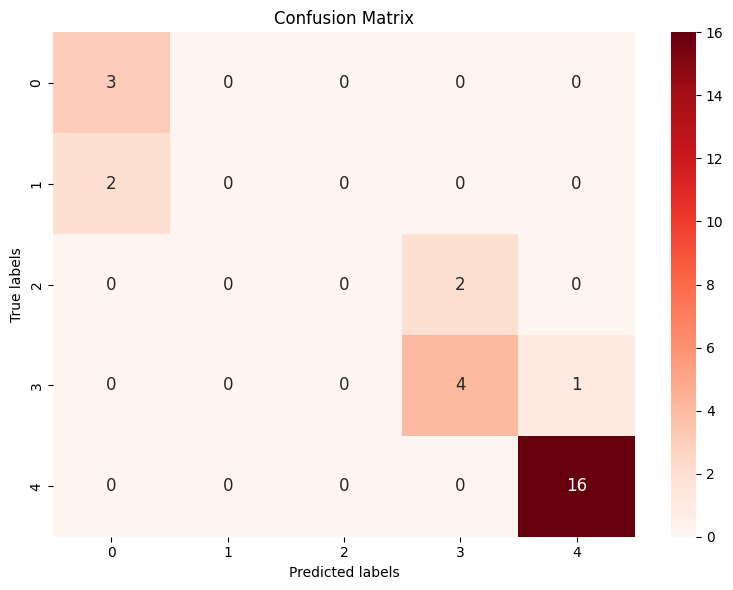

In [58]:
clf_dt6 = tree.DecisionTreeClassifier(max_depth=2, random_state=74, ccp_alpha=0 , criterion = 'entropy')
clf_dt6.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt6);
print(clf_dt6.score(X_test_drug, y_test_drug))
y_pred_drug6 = clf_dt6.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug6 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug6 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug6 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug6 ,average='micro'))
cf_matrix_tree6 = confusion_matrix(y_test_drug, y_pred_drug6)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree6, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree6.png', dpi=300)

0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9310344827586207


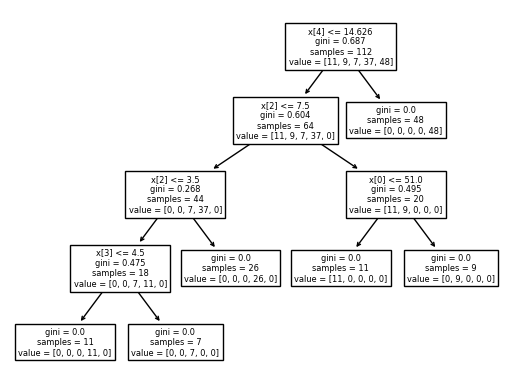

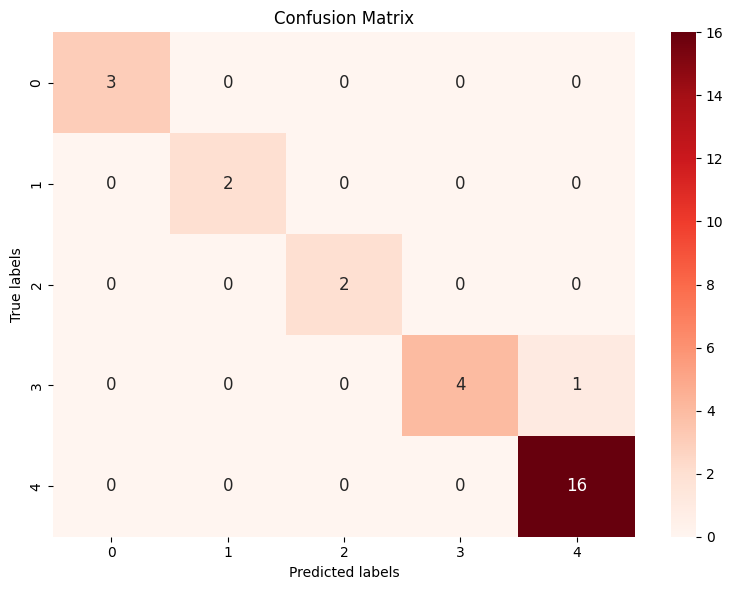

In [59]:
clf_dt7 = tree.DecisionTreeClassifier(max_depth=4, random_state=74, ccp_alpha=0)
clf_dt7.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt7);
print(clf_dt7.score(X_test_drug, y_test_drug))
y_pred_drug7 = clf_dt7.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug7 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug7 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug7 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug7 ,average='micro'))
cf_matrix_tree7 = confusion_matrix(y_test_drug, y_pred_drug7)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree7, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree7.png', dpi=300)

0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9310344827586207


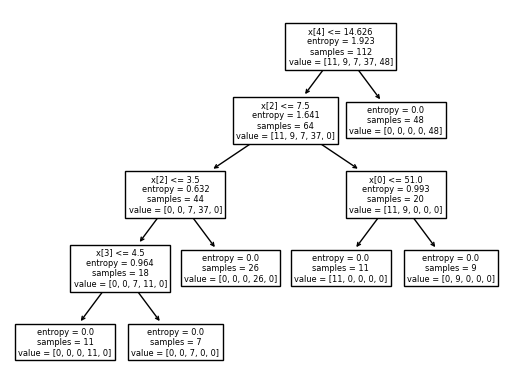

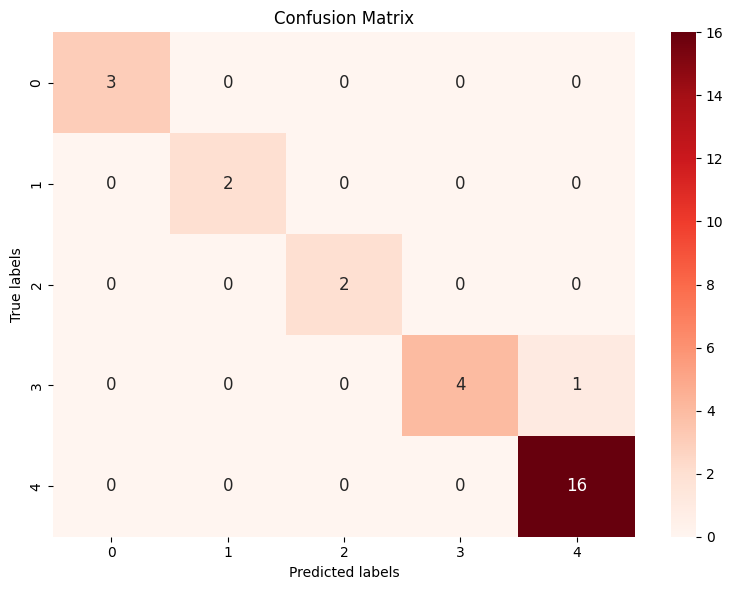

In [60]:
clf_dt8 = tree.DecisionTreeClassifier(max_depth=4, random_state=74, ccp_alpha=0 , criterion = 'entropy')
clf_dt8.fit(X_train_drug, y_train_drug)
tree.plot_tree(clf_dt8);
print(clf_dt8.score(X_test_drug, y_test_drug))
y_pred_drug8 = clf_dt8.predict(X_test_drug)
print(precision_score(y_test_drug , y_pred_drug8 ,average='micro'))
print(recall_score(y_test_drug , y_pred_drug8 ,average='micro'))
print(f1_score(y_test_drug , y_pred_drug8 ,average='micro'))
print(jaccard_score(y_test_drug , y_pred_drug8 ,average='micro'))
cf_matrix_tree8 = confusion_matrix(y_test_drug, y_pred_drug8)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_tree8, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_tree8.png', dpi=300)

K_fold Cross_validation

In [63]:
from sklearn.model_selection import cross_val_score
# with 10 folds

#model_1
scores1 = cross_val_score(clf_dt1, X_pick, y_pick, cv=10)
mean_acc1 = 0
for i in range(len(scores1)):
  mean_acc1 += scores1[i]

print(f"scores for decision tree 1 is \n{scores1} \nand mean of accuracy is \n{mean_acc1/len(scores1)}")
print(f"\n ----------------------------------")

#model_2
scores2 = cross_val_score(clf_dt2, X_pick, y_pick, cv=10)
mean_acc2 = 0
for i in range(len(scores2)):
  mean_acc2 += scores2[i]

print(f"scores for decision tree 2 is \n{scores2} \nand mean of accuracy is \n{mean_acc2/len(scores2)}")
print(f"\n ----------------------------------")

#model_3
scores3 = cross_val_score(clf_dt3, X_pick, y_pick, cv=10)
mean_acc3 = 0
for i in range(len(scores3)):
  mean_acc3 += scores3[i]

print(f"scores for decision tree 3 is \n{scores3} \nand mean of accuracy is \n{mean_acc3/len(scores3)}")
print(f"\n ----------------------------------")

#model_4
scores4 = cross_val_score(clf_dt4, X_pick, y_pick, cv=10)
mean_acc4 = 0
for i in range(len(scores4)):
  mean_acc4 += scores4[i]

print(f"scores for decision tree 4 is \n{scores4} \nand mean of accuracy is \n{mean_acc4/len(scores4)}")
print(f"\n ----------------------------------")

#model_5
scores5 = cross_val_score(clf_dt5, X_pick, y_pick, cv=10)
mean_acc5 = 0
for i in range(len(scores5)):
  mean_acc5 += scores5[i]

print(f"scores for decision tree 5 is \n{scores5} \nand mean of accuracy is \n{mean_acc5/len(scores5)}")
print(f"\n ----------------------------------")

#model_6
scores6 = cross_val_score(clf_dt6, X_pick, y_pick, cv=10)
mean_acc6 = 0
for i in range(len(scores6)):
  mean_acc6 += scores6[i]

print(f"scores for decision tree 6 is \n{scores6} \nand mean of accuracy is \n{mean_acc6/len(scores6)}")
print(f"\n ----------------------------------")

#model_7
scores7 = cross_val_score(clf_dt7, X_pick, y_pick, cv=10)
mean_acc7 = 0
for i in range(len(scores7)):
  mean_acc7 += scores7[i]

print(f"scores for decision tree 7 is \n{scores7} \nand mean of accuracy is \n{mean_acc7/len(scores7)}")
print(f"\n ----------------------------------")

#model_8
scores8 = cross_val_score(clf_dt8, X_pick, y_pick, cv=10)
mean_acc8 = 0
for i in range(len(scores8)):
  mean_acc8 += scores8[i]

print(f"scores for decision tree 8 is \n{scores8} \nand mean of accuracy is \n{mean_acc8/len(scores8)}")
print(f"\n ----------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

scores for decision tree 1 is 
[0.92857143 0.92857143 0.92857143 0.85714286 0.92857143 0.92857143
 0.92857143 0.85714286 0.92857143 1.        ] 
and mean of accuracy is 
0.9214285714285714

 ----------------------------------
scores for decision tree 2 is 
[0.92857143 0.92857143 0.92857143 0.85714286 0.92857143 0.92857143
 0.92857143 0.85714286 0.92857143 1.        ] 
and mean of accuracy is 
0.9214285714285714

 ----------------------------------
scores for decision tree 3 is 
[0.78571429 0.78571429 0.78571429 0.71428571 0.78571429 0.78571429
 0.71428571 0.64285714 0.71428571 0.71428571] 
and mean of accuracy is 
0.742857142857143

 ----------------------------------
scores for decision tree 4 is 
[0.85714286 0.85714286 0.85714286 0.78571429 0.85714286 0.85714286
 0.85714286 0.78571429 0.85714286 0.85714286] 
and mean of accuracy is 
0.8428571428571427

 ----------------------------------
scores for decision tree 5 is 
[0.85714286 0.85714286 0.85714286 0.78571429 0.85714286 0.85714286

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


random_forest

<ipython-input-64-6fcf868b2094>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_random_forest.fit(X_train_drug , y_train_drug)


0.9642857142857143


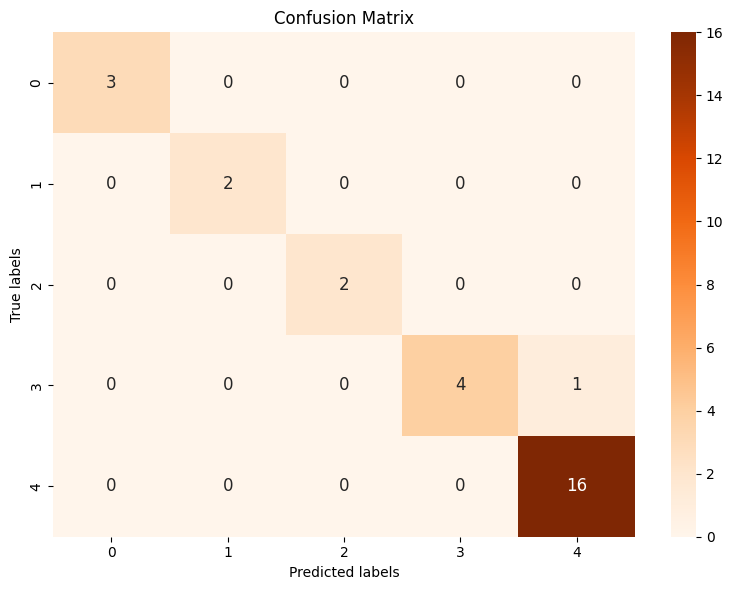

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

clf_random_forest = RandomForestClassifier(max_depth=6, random_state=74)
clf_random_forest.fit(X_train_drug , y_train_drug)
print(clf_random_forest.score(X_test_drug , y_test_drug))
y_pred_drug_forest = clf_random_forest.predict(X_test_drug)

cf_matrix_forest = confusion_matrix(y_test_drug, y_pred_drug_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_forest, annot=True, fmt='d', cmap='Oranges', annot_kws={"size": 12})


plt.gca().set_ylim(len(np.unique(y_test_drug)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig('confusion_matrix_forest.png', dpi=300)

q4 -> bayes

In [65]:
from pandas import DataFrame as df
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

In [66]:
!gdown 17b2KamXEU81051HT3JJykX-duyu9NUdL

Downloading...
From: https://drive.google.com/uc?id=17b2KamXEU81051HT3JJykX-duyu9NUdL
To: /content/heart_Data.csv
100% 38.1k/38.1k [00:00<00:00, 56.2MB/s]


see number of data in each class

target
0    499
1    526
dtype: int64


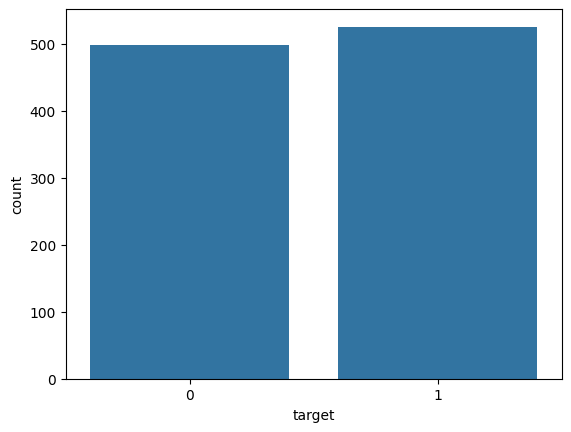

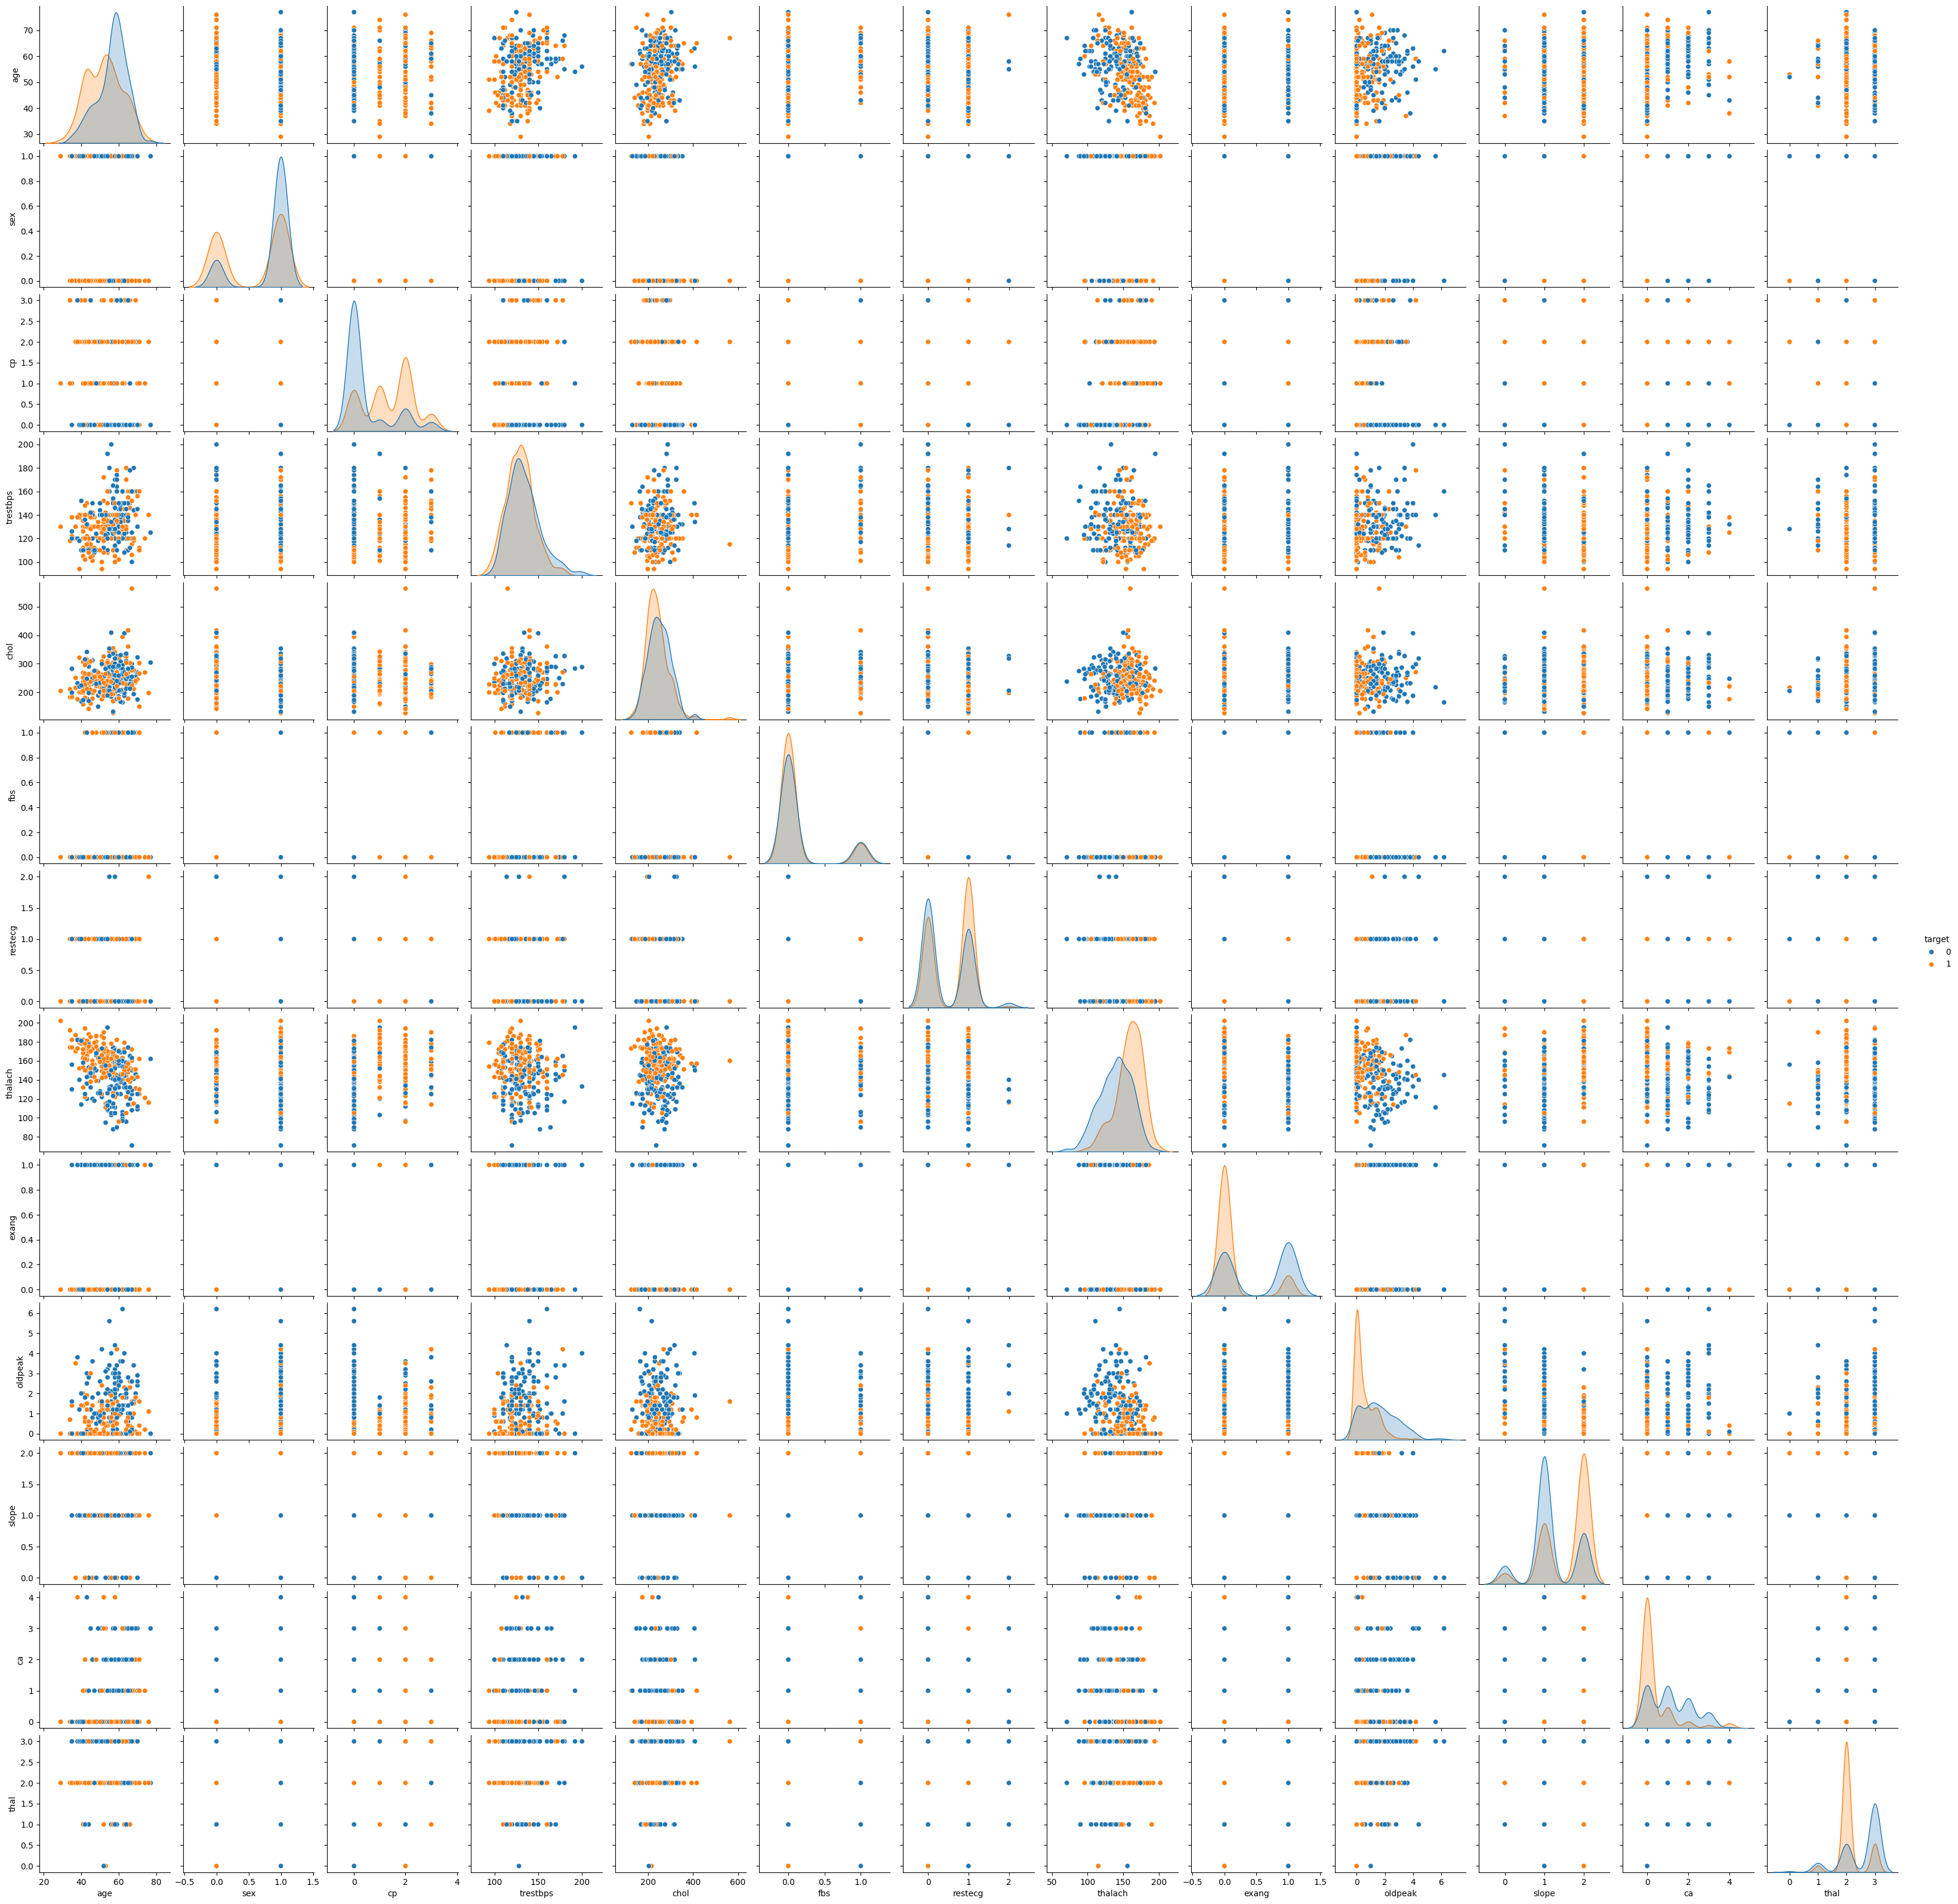

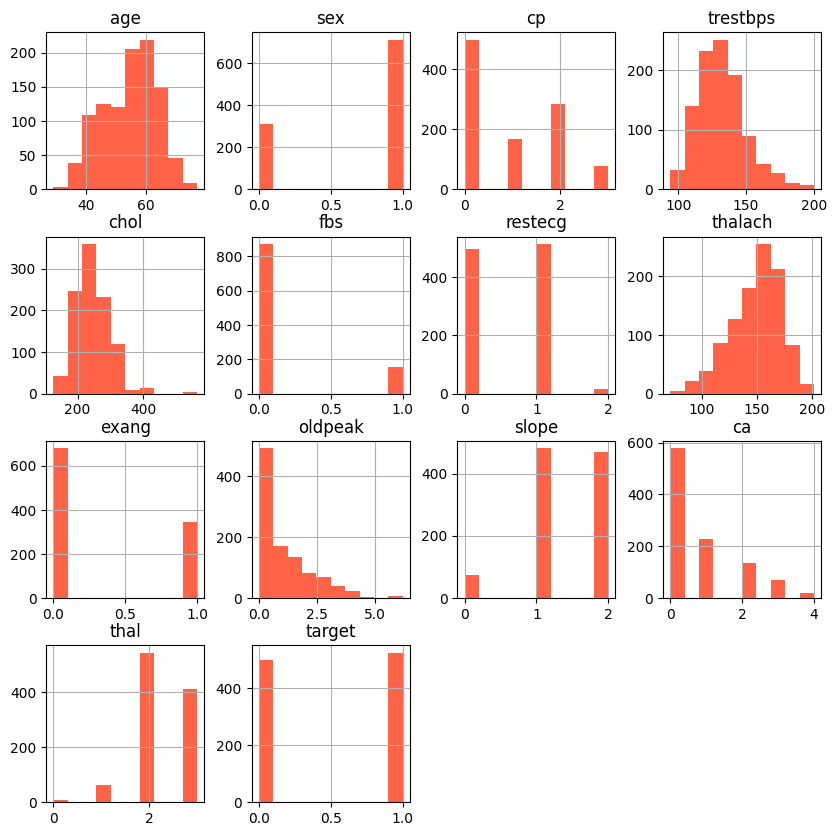

In [67]:
data_heart = pd.read_csv("/content/heart_Data.csv")
print(data_heart.groupby('target').size())
sns.countplot(x='target', data=data_heart)
sns.pairplot(data_heart,hue='target')
data_heart.hist(figsize=(10, 10),color='tomato')
plt.show()

balance data

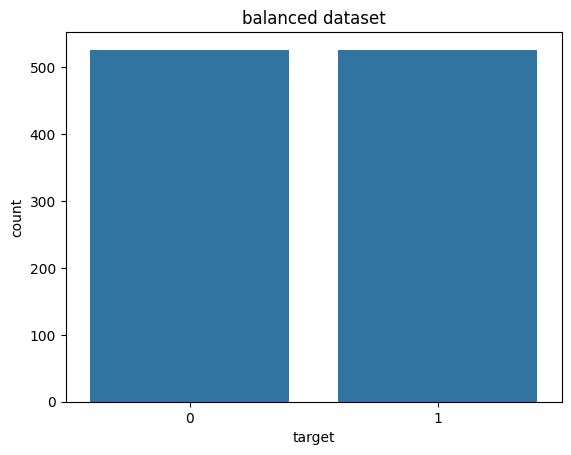

target
0    526
1    526
dtype: int64


In [68]:
X = data_heart.drop('target', axis=1)
y = data_heart['target']

smote = SMOTE(random_state=74)
X_resample, y_resample = smote.fit_resample(X, y)


X_resample_df = pd.DataFrame(X_resample, columns=X.columns)
y_resample_df = pd.DataFrame(y_resample, columns=['target'])

balanced_data = pd.concat([X_resample_df, y_resample_df], axis=1)

sns.countplot(data=balanced_data, x='target')
plt.title('balanced dataset')
plt.xlabel('target')
plt.ylabel('count')
plt.show()

print(balanced_data.groupby('target').size())

corr matrix

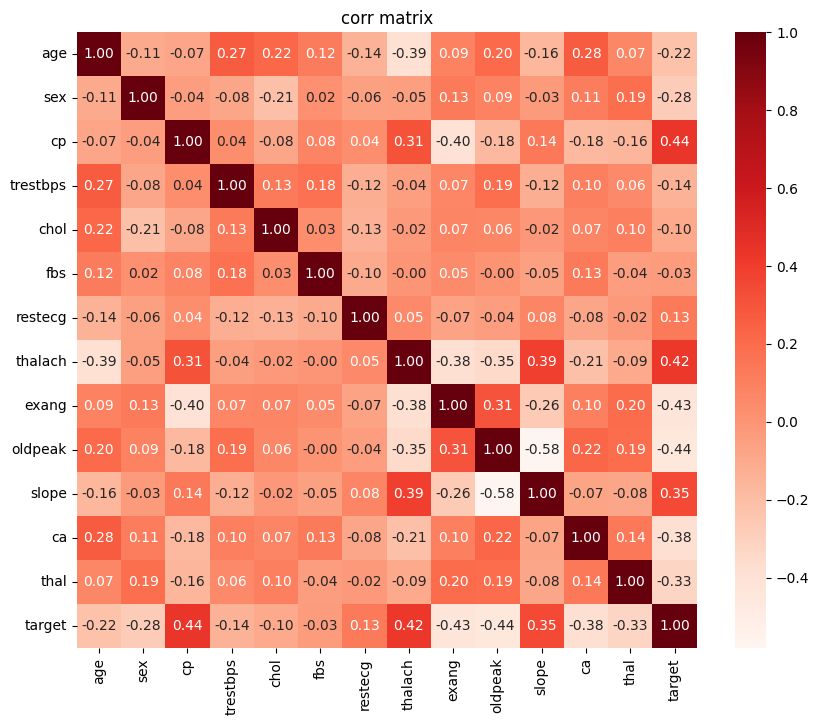

In [69]:
correlation_matrix = balanced_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('corr matrix')
plt.show()

shuffling and define X , y (data and target)

In [70]:
shuffled_data_heart = shuffle(balanced_data, random_state=74)
shuffled_data_heart_arr = np.array(shuffled_data_heart)
X_heart = np.array(shuffled_data_heart_arr[: , :13])
y_heart = np.array(shuffled_data_heart_arr[: , 13])
print(X_heart.shape)


(1052, 13)


In [71]:
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=74)

print(X_train_heart.shape)
print(X_test_heart.shape)
print(y_train_heart.shape)
print(y_test_heart.shape)



(841, 13)
(211, 13)
(841,)
(211,)


normalizing data

In [72]:
scaler = StandardScaler()
scaler.fit(X_train_heart)
X_train_norm = scaler.transform(X_train_heart)
X_test_norm = scaler.transform(X_test_heart)

`bayes` classifier

In [73]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


train and test model

In [74]:
model_bayes = NaiveBayes()
model_bayes.fit(X_train_norm, y_train_heart)
y_pred_bayes = model_bayes.predict(X_test_norm)
model_gauss = GaussianNB()
model_gauss.fit(X_train_norm, y_train_heart)
y_pred_gauss = model_gauss.predict(X_test_norm)

bayes model report

In [75]:
print(classification_report(y_test_heart,y_pred_bayes))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        92
         1.0       0.87      0.87      0.87       119

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



gauss model report

In [76]:
print(classification_report(y_test_heart,y_pred_gauss))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        92
         1.0       0.87      0.87      0.87       119

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



confusion_matrix for bayes model

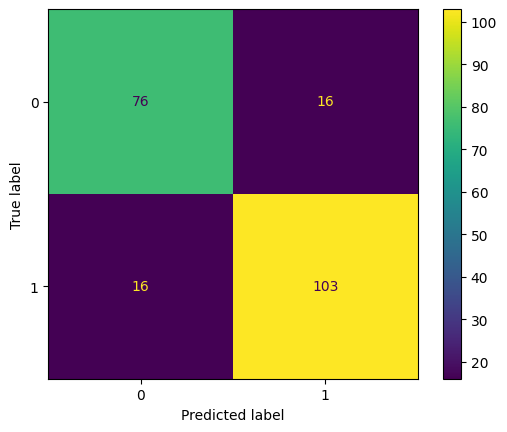

In [77]:
conf_matrix_bayes = confusion_matrix(y_test_heart,y_pred_bayes)
names = list(shuffled_data_heart.groupby('target').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bayes, display_labels=names)
disp.plot()
plt.show()

report of bayes model

In [78]:
print('Accuracy_bayes_model :',accuracy_score(y_test_heart,y_pred_bayes))
print('Precision_bayes_model :',precision_score(y_test_heart,y_pred_bayes,average='micro'))
print('Recall_bayes_model :',recall_score(y_test_heart,y_pred_bayes,average='micro'))
print('F1 score_bayes_model :',f1_score(y_test_heart,y_pred_bayes,average='micro'))
print('Jaccard score_bayes_model :',jaccard_score(y_test_heart,y_pred_bayes,average='micro'))

Accuracy_bayes_model : 0.8483412322274881
Precision_bayes_model : 0.8483412322274881
Recall_bayes_model : 0.8483412322274881
F1 score_bayes_model : 0.8483412322274881
Jaccard score_bayes_model : 0.7366255144032922


confusion_matrix for gauss model

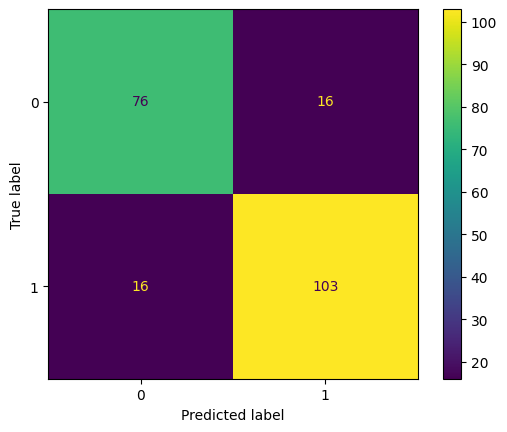

In [79]:
conf_matrix_gauss = confusion_matrix(y_test_heart,y_pred_gauss)
names = list(shuffled_data_heart.groupby('target').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gauss, display_labels=names)
disp.plot()
plt.show()

report of gauss model

In [80]:
print('Accuracy_gauss_model :',accuracy_score(y_test_heart,y_pred_gauss))
print('Precision_gauss_model :',precision_score(y_test_heart,y_pred_gauss,average='micro'))
print('Recall_gauss_model :',recall_score(y_test_heart,y_pred_gauss,average='micro'))
print('F1 score_gauss_model :',f1_score(y_test_heart,y_pred_gauss,average='micro'))
print('Jaccard score_gauss_model :',jaccard_score(y_test_heart,y_pred_gauss,average='micro'))

Accuracy_gauss_model : 0.8483412322274881
Precision_gauss_model : 0.8483412322274881
Recall_gauss_model : 0.8483412322274881
F1 score_gauss_model : 0.8483412322274881
Jaccard score_gauss_model : 0.7366255144032922


creating random samples with `random`

In [81]:
import random
data_for_s = np.append(X_test_norm , y_test_heart.reshape(211 , 1) , axis = 1)
samples = random.sample(list(data_for_s) , 5)
X_sample = (np.array(samples))[: , :13]
y_sample = (np.array(samples))[: , 13]


predict with `model_bayes` & `model_gauss`

In [82]:
y_pred_sample = model_bayes.predict(X_sample)
print(f"our model predict is {y_pred_sample} and true label is {y_sample}")
acc = 0
for i in range(len(y_pred_sample)):
  if (y_pred_sample[i] == y_sample[i]):
    acc += 1

print(f"{(100*acc)/len(y_pred_sample)}% of predicts are true")


our model predict is [1. 1. 1. 1. 0.] and true label is [1. 1. 1. 0. 1.]
60.0% of predicts are true
